# Housing Market Project

The Housing Market Project was part of the assignment for IBM Python Data Science program.  For this project, I used the same dataset and went further into Exploratory Data Analysis. 

### Objective: 

Analyze and predict housing prices using variables given in the dataset. 

### The Dataset Used in This Worksheet

The dataset contains house sale prices for King County, which is Seattle, Washington and surrounding area. It includes homes sold between May 2014 and May 2015.\
Source: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


### Import Required Libraries

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Import Data Sets

In [3]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

### Data Overview

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace = True)

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Dealing with Missing Values

In [9]:
# Total count of missing values in each columns
df.isna().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [10]:
df.head(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


Replacing NaN in `bathrooms` with mean value

In [11]:
mean_bath = df['bathrooms'].mean()
df['bathrooms'].fillna(mean_bath, inplace = True)

Replacing NaN in `bedrooms` with mean value

In [12]:
mean_bed = df['bedrooms'].mean()
df['bedrooms'].fillna(mean_bed, inplace = True)

## Exploratory Data Analysis

Count # of houses with unique floor values

In [13]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [14]:
df['bathrooms'].value_counts().to_frame()

,bathrooms
2.500000,5380
1.000000,3852
1.750000,3048
2.250000,2047
2.000000,1930
1.500000,1446
2.750000,1185
3.000000,753
3.500000,731
3.250000,589


In [15]:
df['bedrooms'].value_counts().to_frame()

,bedrooms
3.00000,9824
4.00000,6882
2.00000,2760
5.00000,1601
6.00000,272
1.00000,199
7.00000,38
3.37287,13
8.00000,13
9.00000,6


<AxesSubplot:xlabel='waterfront', ylabel='price'>

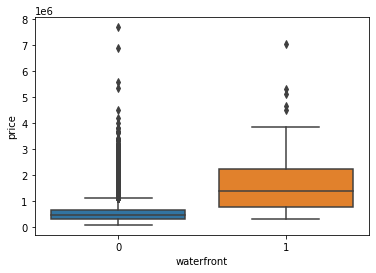

In [16]:
sns.boxplot(x="waterfront",y="price",data=df)

Figure 1: 

Figure 2:

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

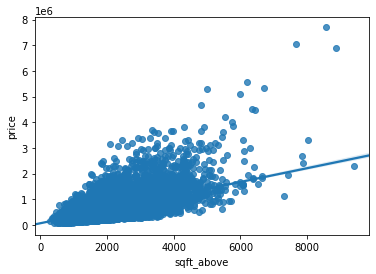

In [17]:
sns.regplot(x="sqft_above",y="price",data=df)

Figure 3: Heteroskedasticity is detected between `sqft_above` and `price`.

<AxesSubplot:xlabel='grade', ylabel='price'>

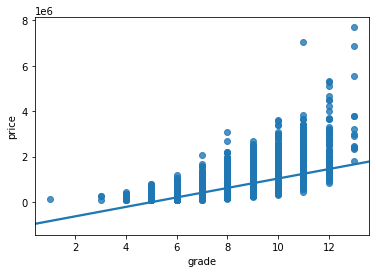

In [18]:
sns.regplot(x="grade",y="price",data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

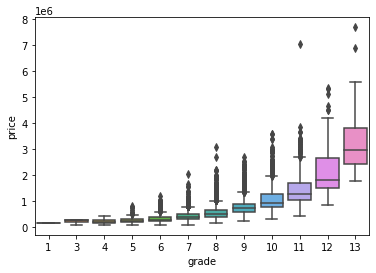

In [19]:
sns.boxplot(x="grade",y="price",data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

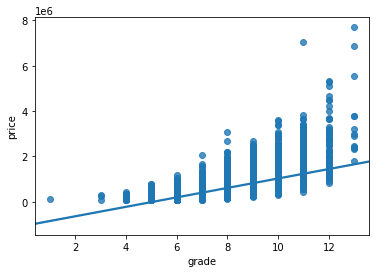

In [20]:
sns.regplot(x="grade",y="price",data=df)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

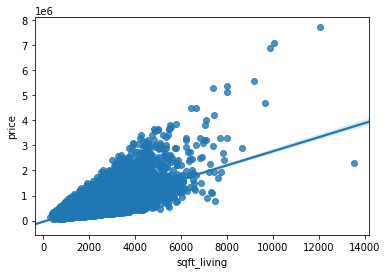

In [21]:
sns.regplot(x="sqft_living",y="price",data=df)

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

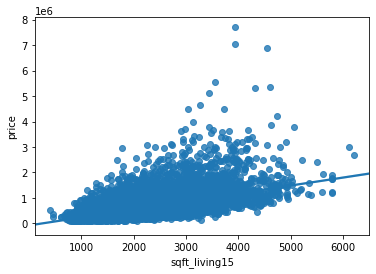

In [22]:
sns.regplot(x="sqft_living15",y="price",data=df)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

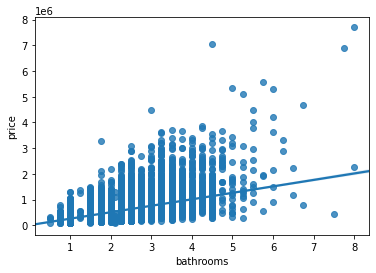

In [23]:
sns.regplot(x="bathrooms",y="price",data=df)

Calculate correlations between predictor variables and the target variable (`price`)

In [24]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

Top 3 predictor variables that are highly correlated with price are `sqft_living`, `grade`, and `sqft_above`.

In [25]:
df.corr()['sqft_living'].sort_values(ascending=False)

sqft_living      1.000000
sqft_above       0.876597
grade            0.762704
sqft_living15    0.756420
bathrooms        0.755371
price            0.702035
bedrooms         0.578077
sqft_basement    0.435043
floors           0.353949
yr_built         0.318049
view             0.284611
long             0.240223
sqft_lot15       0.183286
sqft_lot         0.172826
waterfront       0.103818
yr_renovated     0.055363
lat              0.052529
condition       -0.058753
zipcode         -0.199430
Name: sqft_living, dtype: float64

<AxesSubplot:>

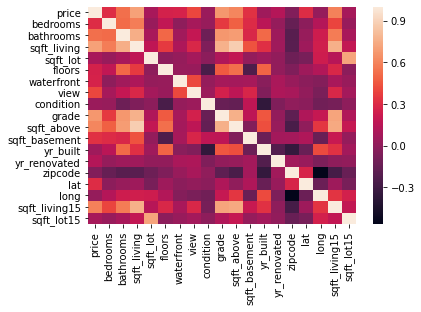

In [26]:
correlations = df.corr(method='pearson')
sns.heatmap(data = correlations)

In [27]:
cor_mat = correlations.unstack().sort_values(ascending=False)
print(cor_mat)

price        price          1.000000
sqft_above   sqft_above     1.000000
sqft_living  sqft_living    1.000000
sqft_lot     sqft_lot       1.000000
floors       floors         1.000000
                              ...   
zipcode      yr_built      -0.346869
condition    yr_built      -0.361417
yr_built     condition     -0.361417
zipcode      long          -0.564072
long         zipcode       -0.564072
Length: 361, dtype: float64


## Model Development

We will Fit a linear regression model using the  longitude feature <code>'long'</code> and  caclculate the R^2.

In [28]:
X = df[['long']]
Y = df[['price']]
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.00046769430149007363

This time we will fit a linear regression model using the `sqft_living` feature, and calculate the R^2.

In [29]:
X = df[['sqft_living']]
Y = df[['price']]
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.4928532179037931

We will pick top features that have some correlations with `price`(top 11 and more than 0.2 correlation), and fit the linear regression model to predict the `price`, then calculate R^2.

In [30]:
# top 11 features
features =["floors", 
        "waterfront",
        "lat",
        "bedrooms",
        "sqft_basement",
        "view",
        "bathrooms",
        "sqft_living15",
        "sqft_above",
        "grade",
        "sqft_living"] 
features

['floors',
 'waterfront',
 'lat',
 'bedrooms',
 'sqft_basement',
 'view',
 'bathrooms',
 'sqft_living15',
 'sqft_above',
 'grade',
 'sqft_living']

In [31]:
X = df[features]
Y = df[['price']]
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.6576435327932311

### Create a Pipeline Object

Create a list of tuples, with the name of the estimator and the model constructor.

In [32]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Use the list of Input to create a pipeline object to predict `price`, fit the object using the `features`, and calculate R^2.

In [33]:
# Input the pipeline tuple to the pipeline constructor:
pipe = Pipeline(Input)
pipe.fit(X,Y)
pipe.score(X,Y)

0.7443282057480394

In [34]:
pipe.predict(X)

array([[357624.],
       [575112.],
       [455864.],
       ...,
       [426800.],
       [467616.],
       [426928.]])

## Model Evaluation and Refinement

Import necessary modules.

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

We will split the main data into training and test data sets. (Test set = 15%)

In [36]:
features =["floors", 
"waterfront",
"lat","bedrooms",
"sqft_basement",
"view",
"bathrooms",
"sqft_living15",
"sqft_above",
"grade",
"sqft_living"]

X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.15, random_state=1)

print("# of testing samples:", x_test.shape[0])
print("# of training samples:", y_train.shape[0])

# of testing samples: 3242
# of training samples: 18371


### Ridge Regression

Import necessary modules.

In [37]:
from sklearn.linear_model import Ridge

Create and fit a Ridge regression object using the training data, set the regulation parameter to 0.1, and calculate R^2 using the testing data.

In [38]:
Ridgemod01 = Ridge(alpha=0.1)
Ridgemod01.fit(x_train, y_train)
Ridgemod01.score(x_test, y_test)

0.6478759163939111

Run a 2nd order polynomial transformation on both training and testing data. Then create and fit a Ridge regression object using the training data with setting the regularization parameter to 0.1. And calculate R^2 with testing data. 

In [39]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

In [40]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)


Ridge(alpha=0.1)

In [41]:
RidgeModel.score(x_test_pr, y_test)

0.7002744264405159

#### Conclusion

Based on R^2 scores, Running the pipeline with 11 top features produces the best prediction model, with R^2 = 0.74. I will extend this project by addressing Heteroskedasticity issues I detected in several predictors. 